In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df=pd.read_csv("titanic-training-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualization

<Axes: xlabel='SibSp', ylabel='count'>

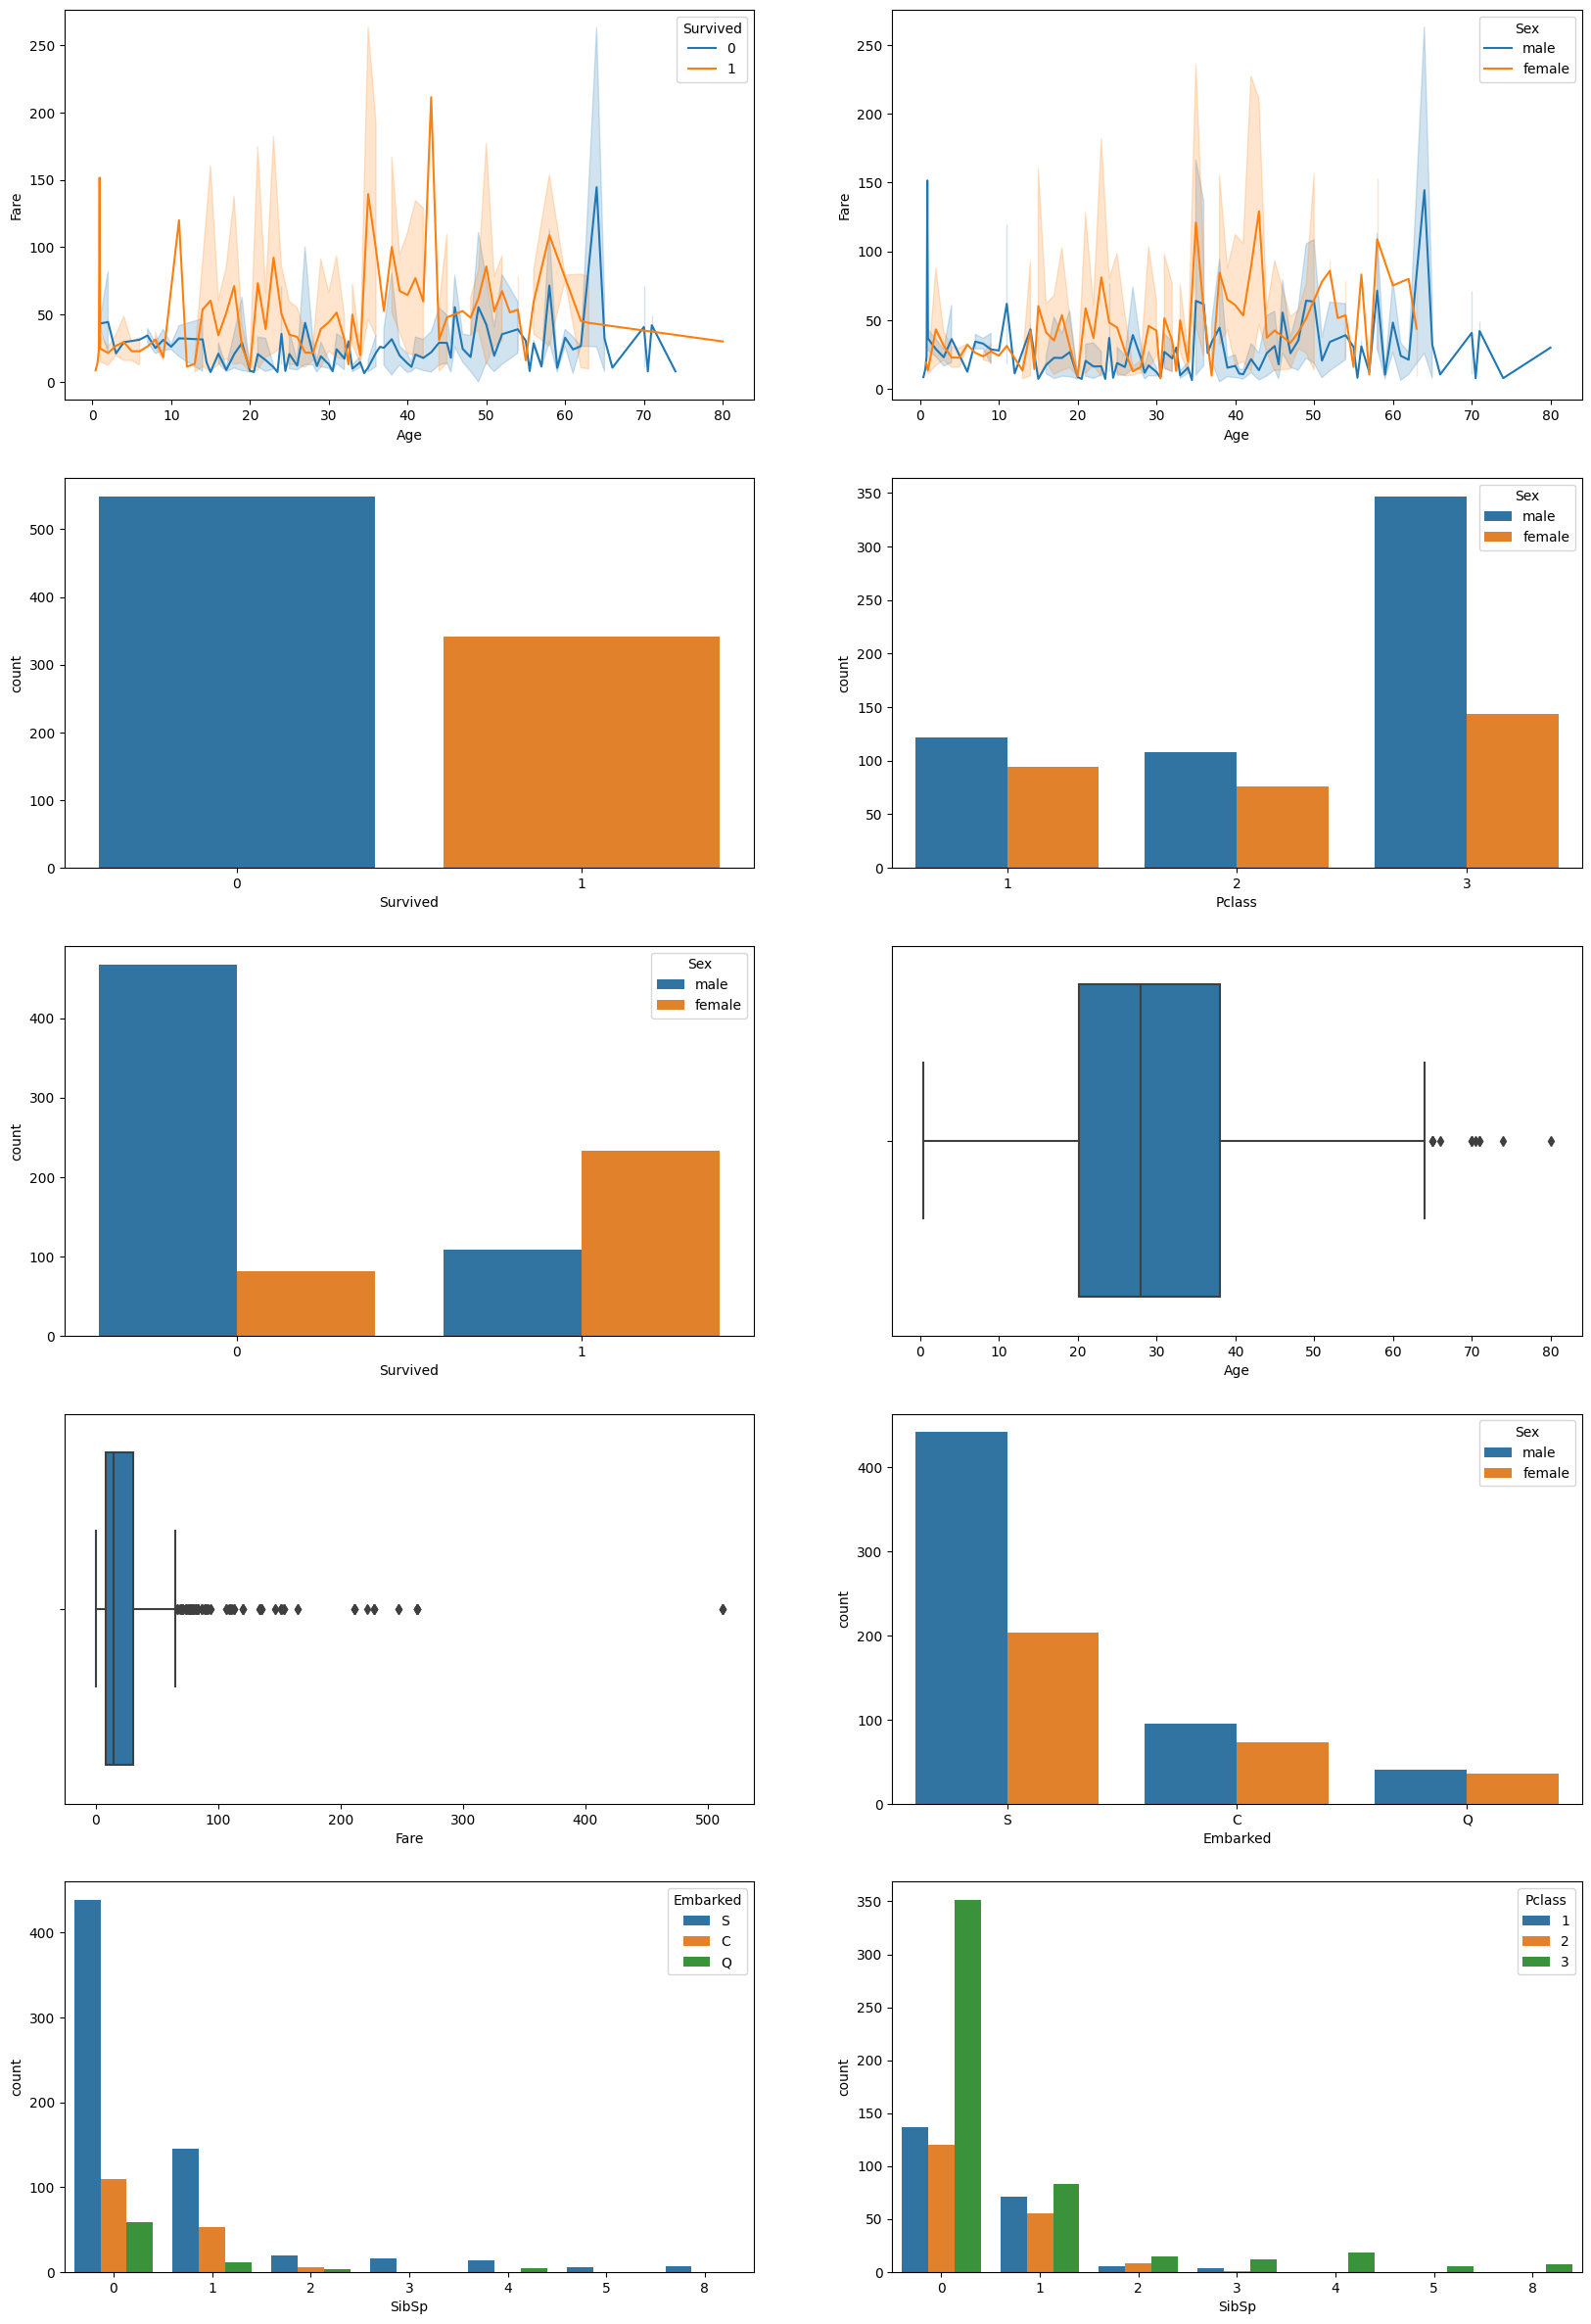

In [3]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.lineplot(data=df,x="Age",y="Fare",hue="Survived")
plt.subplot(5,2,2)
sns.lineplot(data=df,x="Age",y="Fare",hue="Sex")
plt.subplot(5,2,3)
sns.countplot(data=df,x="Survived")
plt.subplot(5,2,4)
sns.countplot(data=df,x="Pclass",hue="Sex")
plt.subplot(5,2,5)
sns.countplot(data=df,x="Survived",hue="Sex")
plt.subplot(5,2,6)
sns.boxplot(data=df,x="Age")
plt.subplot(5,2,7)
sns.boxplot(data=df,x="Fare")
plt.subplot(5,2,8)
sns.countplot(data=df,x="Embarked",hue="Sex")
plt.subplot(5,2,9)
sns.countplot(data=df,x="SibSp",hue="Embarked")
plt.subplot(5,2,10)
sns.countplot(data=df,x="SibSp",hue="Pclass")

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

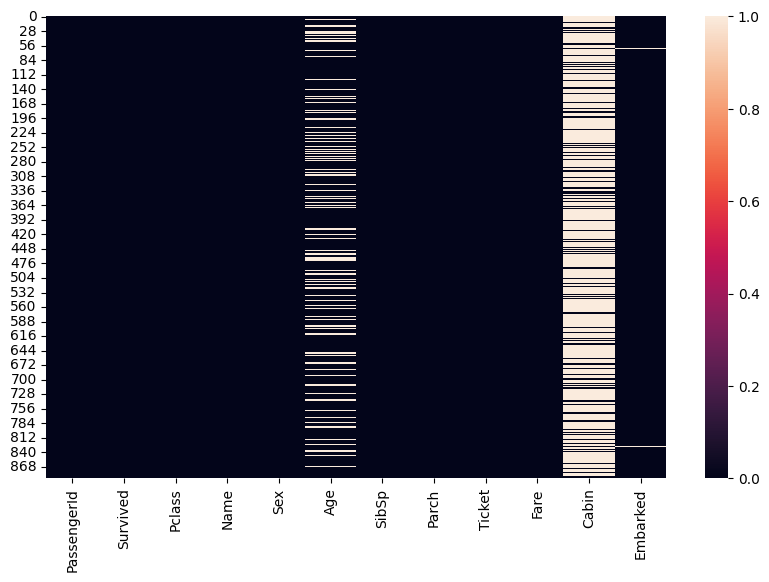

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df[["Cabin","Pclass"]].groupby("Pclass").count()

,Cabin
Pclass,
1,176
2,16
3,12


In [10]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

- Passenger with 1st class had luxurious cabin with deck A,B,C
- Passenger with 2nd class had moderately comfortable cabin with deck D,E
- Passenger with 3rd class had dormitory style room not a personal cabin with deck F,G

Deck is used as prefix of all type cabin 

In [11]:
df["Cabin"].iloc[1]

'C85'

In [12]:
df["Cabin"].iloc[1][0]

'C'

In [13]:
df["CabinType"]=df["Cabin"].apply(lambda x: "lux" if pd.notna(x) and x[0] in "ABC" else "mod" if pd.notna(x) and x[0] in "DE" else "dor")

- 1 for luxurious type
- 2 for moderately
- 3 for dormitory

In [14]:
df.drop(["Cabin","Name"], axis=1, inplace=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinType
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,dor
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,lux
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,dor
3,4,1,1,female,35.0,1,0,113803,53.1000,S,lux
4,5,0,3,male,35.0,0,0,373450,8.0500,S,dor


In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
CabinType        0
dtype: int64

In [17]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
df[df.Embarked=="S"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinType
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,dor
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,dor
3,4,1,1,female,35.0,1,0,113803,53.1000,S,lux
4,5,0,3,male,35.0,0,0,373450,8.0500,S,dor
6,7,0,1,male,54.0,0,0,17463,51.8625,S,mod
...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,male,28.0,0,0,C.A./SOTON 34068,10.5000,S,dor
884,885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S,dor
886,887,0,2,male,27.0,0,0,211536,13.0000,S,dor
887,888,1,1,female,19.0,0,0,112053,30.0000,S,lux


In [19]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinType
61,62,1,1,female,38.0,0,0,113572,80.0,NaN,lux
829,830,1,1,female,62.0,0,0,113572,80.0,NaN,lux


In [20]:
df[df.CabinType=="lux"]["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [21]:
df.Embarked.fillna(df[df.CabinType == "lux"]["Embarked"].mode()[0], inplace=True)


In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
CabinType        0
dtype: int64

<Axes: xlabel='CabinType', ylabel='Age'>

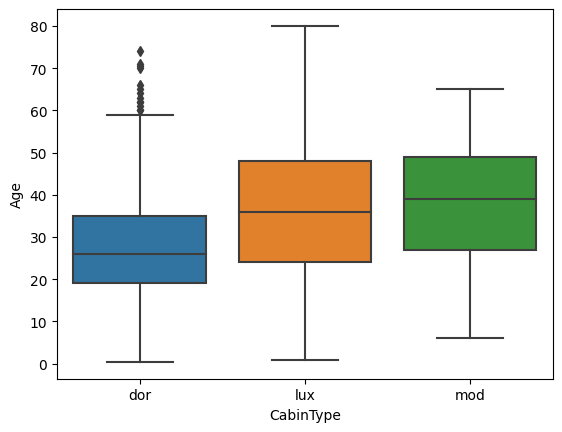

In [23]:
sns.boxplot(data=df,y="Age",x="CabinType")

<Axes: xlabel='CabinType', ylabel='Age'>

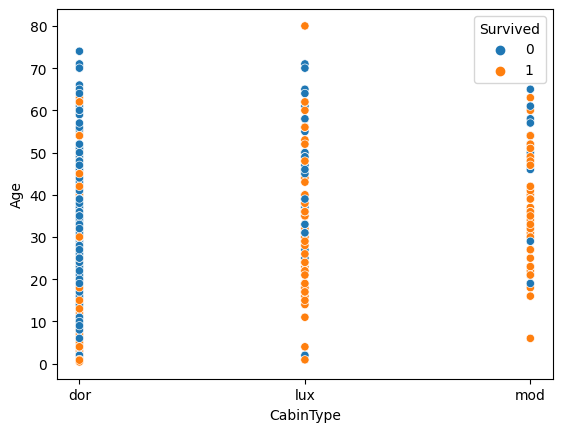

In [24]:
sns.scatterplot(data=df,y="Age",x="CabinType",hue="Survived")

<Axes: xlabel='Survived', ylabel='Age'>

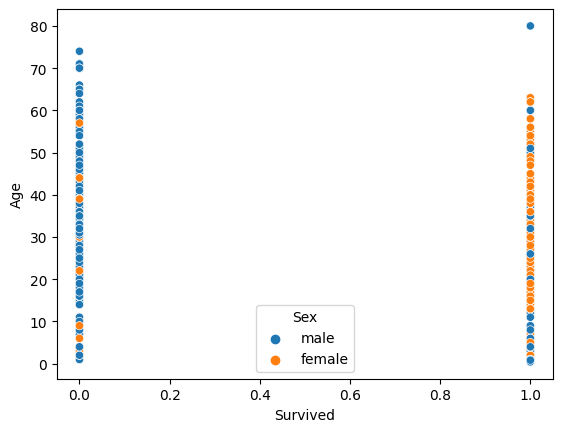

In [25]:
sns.scatterplot(data=df,y="Age",x="Survived",hue="Sex")

After filling missing data point on age, I refer to remove outlier. Because there is more missing values 

In [26]:
df.Age[df.Sex=="male"].isna().sum()

124

In [27]:
df.loc[df.Sex == "male", "Age"] = df.loc[df.Sex == "male", "Age"].fillna(df.loc[df.Sex == "male", "Age"].median())

In [28]:
df.Age[df.Sex=="male"].isna().sum()

0

In [29]:
df.Age[df.Sex=="female"].isna().sum()

53

In [30]:
df.loc[df.Sex == "female", "Age"] = df.loc[df.Sex == "female", "Age"].fillna(df.loc[df.Sex == "female", "Age"].median())

In [31]:
df.Age[df.Sex=="female"].isna().sum()

0

<Axes: xlabel='Age'>

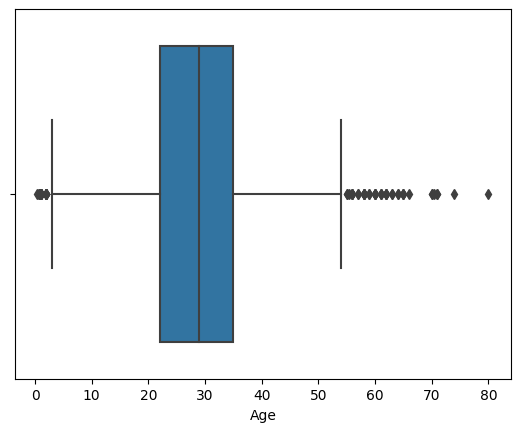

In [32]:
sns.boxplot(data=df,x="Age")

In [33]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinType      0
dtype: int64

<Axes: >

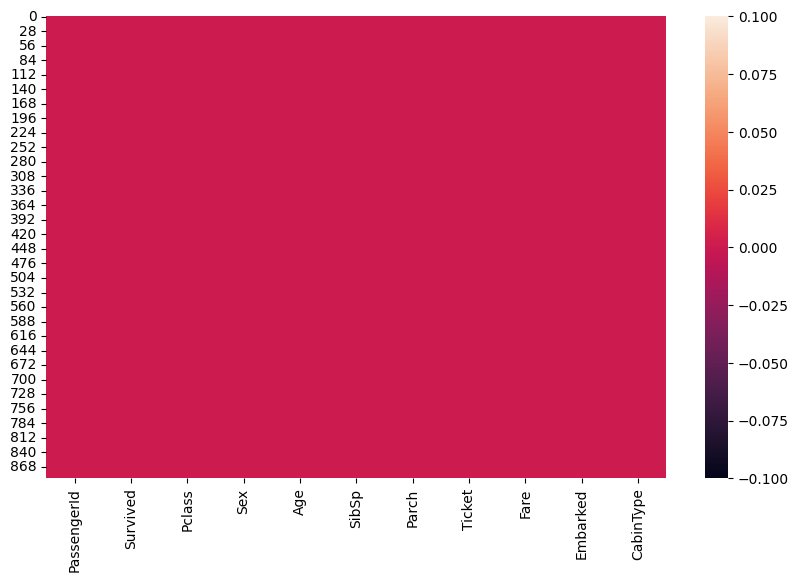

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [35]:
#Steps for removing outlier
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
IQR=Q3-Q1
lowerbond=Q1-IQR*1.5
upperbond=Q3+IQR*1.5
df=df[(df.Age>=lowerbond) & (df.Age<=upperbond)]

<Axes: xlabel='Age'>

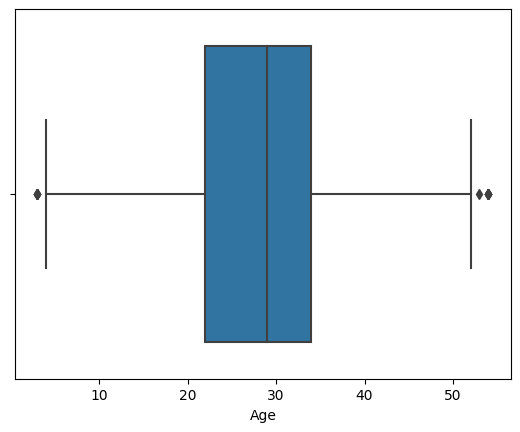

In [36]:
sns.boxplot(data=df,x="Age")

In [37]:
df.shape

(825, 11)

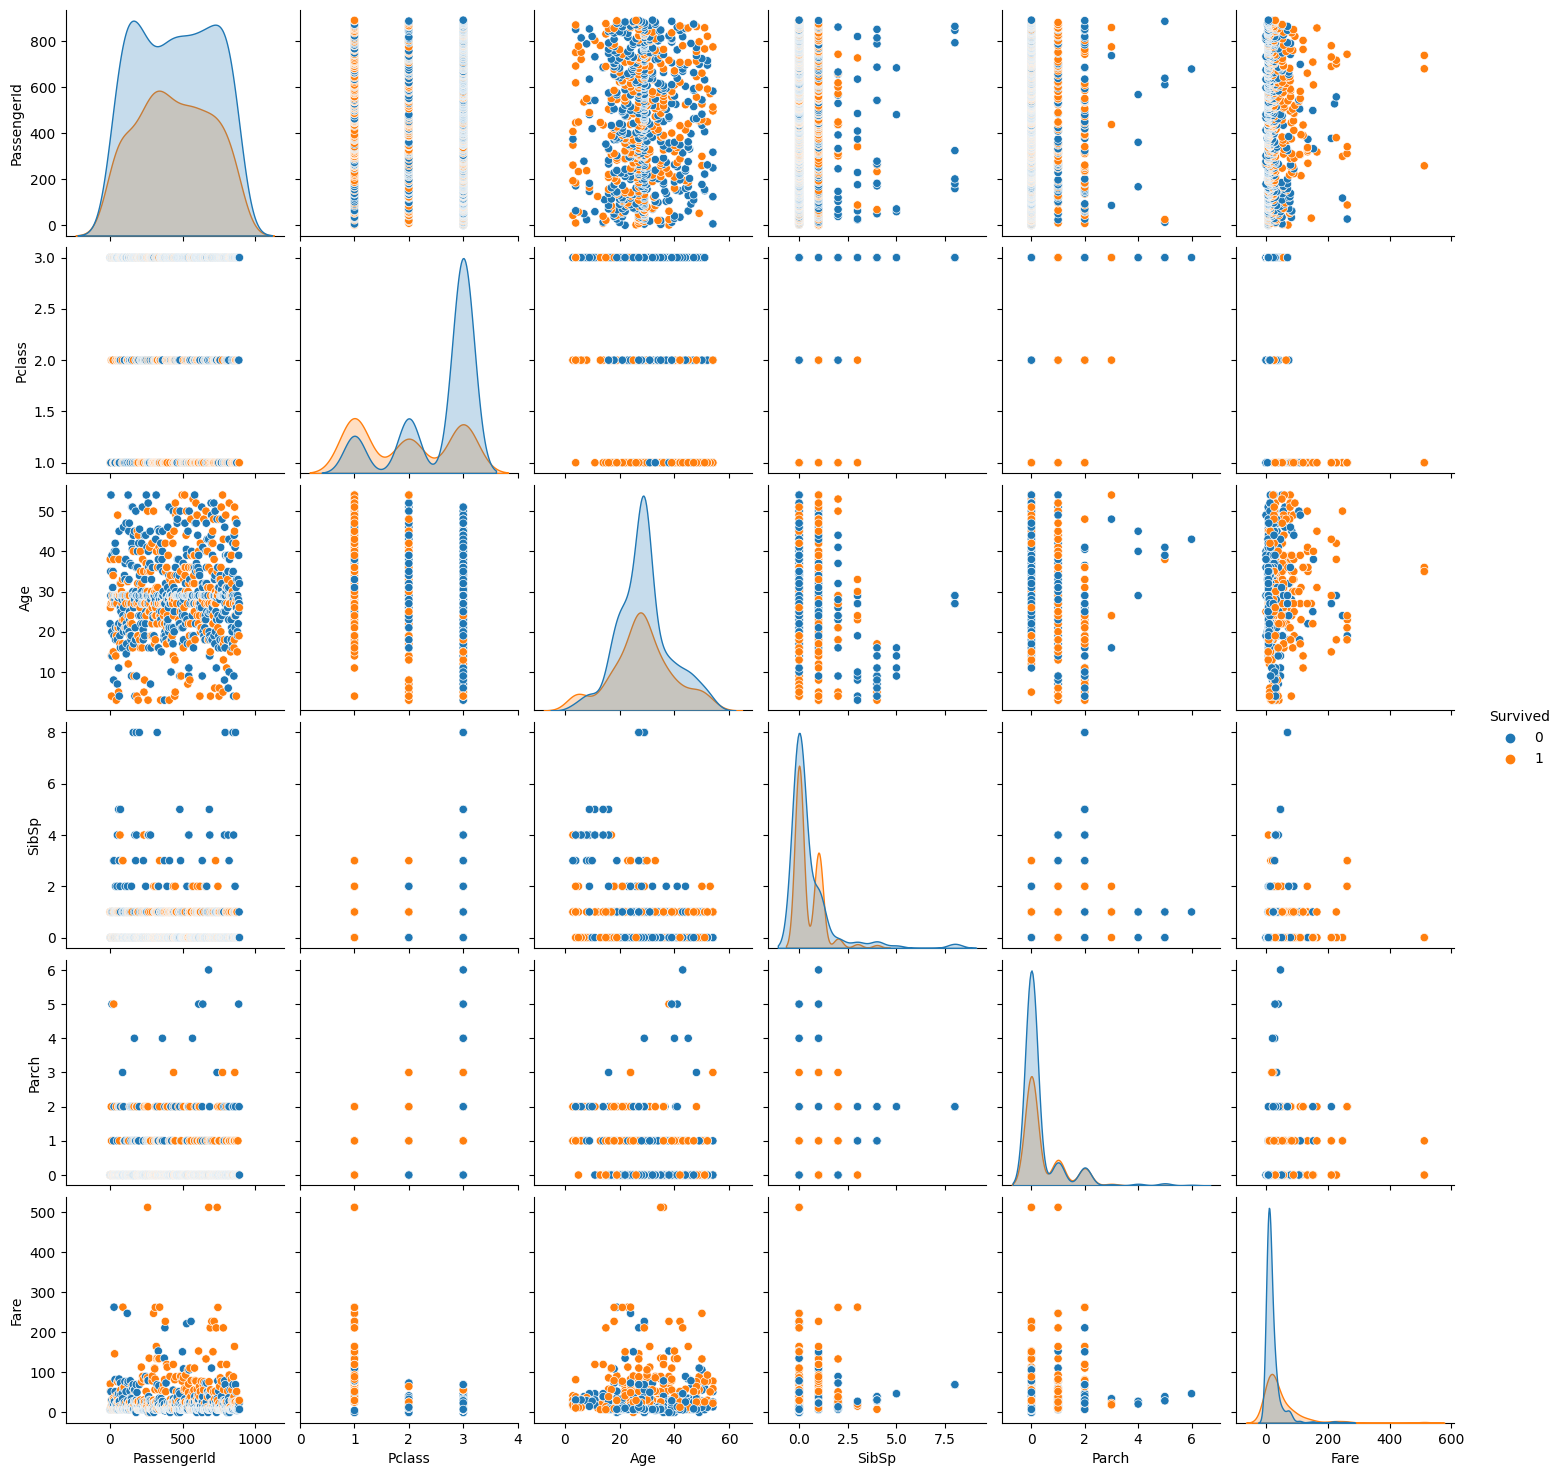

In [40]:
sns.pairplot(df,hue="Survived")

In [41]:
#Feature Extraction
print(df.apply(lambda x: x.nunique()))

PassengerId    825
Survived         2
Pclass           3
Sex              2
Age             63
SibSp            7
Parch            7
Ticket         647
Fare           239
Embarked         3
CabinType        3
dtype: int64


In [42]:
df.drop("PassengerId",axis=1,inplace=True)

In [43]:
df.drop("Ticket",axis=1,inplace=True)

In [44]:
dummies=[("Pclass","pc"),("Sex","sex"),("SibSp","sib"),("Parch","pa"),("Embarked","em"),("CabinType","ct")]
for col,pre in dummies:
    dummie=pd.get_dummies(df[col],prefix=pre)
    df=pd.concat([df,dummie],axis=1)
    df=df.drop(col,axis=1)

In [45]:
df.head()

,Survived,Age,Fare,pc_1,pc_2,pc_3,sex_female,sex_male,sib_0,sib_1,...,pa_3,pa_4,pa_5,pa_6,em_C,em_Q,em_S,ct_dor,ct_lux,ct_mod
0,0,22.0,7.2500,False,False,True,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
1,1,38.0,71.2833,True,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2,1,26.0,7.9250,False,False,True,True,False,True,False,...,False,False,False,False,False,False,True,True,False,False
3,1,35.0,53.1000,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,0,35.0,8.0500,False,False,True,False,True,True,False,...,False,False,False,False,False,False,True,True,False,False


# Split Data into test and train

In [46]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [47]:
x.head()

,Age,Fare,pc_1,pc_2,pc_3,sex_female,sex_male,sib_0,sib_1,sib_2,...,pa_3,pa_4,pa_5,pa_6,em_C,em_Q,em_S,ct_dor,ct_lux,ct_mod
0,22.0,7.2500,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,True,True,False,False
1,38.0,71.2833,True,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,26.0,7.9250,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
3,35.0,53.1000,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
4,35.0,8.0500,False,False,True,False,True,True,False,False,...,False,False,False,False,False,False,True,True,False,False


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((552, 27), (273, 27), (552,), (273,))

# Scaling

In [50]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [51]:
x_train

array([[-1.00343628, -0.43438774, -0.52704628, ...,  0.47609523,
        -0.35247163, -0.28325754],
       [-2.17014892,  0.05242623, -0.52704628, ...,  0.47609523,
        -0.35247163, -0.28325754],
       [ 0.06605031, -0.08034122,  1.8973666 , ..., -2.10042013,
         2.83710774, -0.28325754],
       ...,
       [-0.42007996, -0.46432114, -0.52704628, ...,  0.47609523,
        -0.35247163, -0.28325754],
       [ 0.06605031, -0.47761435, -0.52704628, ...,  0.47609523,
        -0.35247163, -0.28325754],
       [-1.34372747, -0.32932237, -0.52704628, ...,  0.47609523,
        -0.35247163, -0.28325754]])

# Model training

## Logistic without hyperperameter tuning


In [52]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=model_log.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

## Confusion matrix, accurracy score, classification report

In [54]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[149  25]
 [ 22  77]]
0.8278388278388278
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       174
           1       0.75      0.78      0.77        99

    accuracy                           0.83       273
   macro avg       0.81      0.82      0.81       273
weighted avg       0.83      0.83      0.83       273



## Hyperperameter Tuning

In [55]:
pram={
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C' : [1,10,20,30,50,100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
model=GridSearchCV(LogisticRegression(),param_grid=pram,refit=True,cv=5)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [56]:
model.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

Now using this peramater into logistic regression

In [57]:
model_log=LogisticRegression(C=0.1,penalty='l2',solver='lbfgs')
model_log.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [58]:
y_pred=model_log.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [59]:
model_log.predict_proba(x_test)

array([[0.93850359, 0.06149641],
       [0.71009778, 0.28990222],
       [0.83880692, 0.16119308],
       [0.64950853, 0.35049147],
       [0.34270646, 0.65729354],
       [0.84330995, 0.15669005],
       [0.89045583, 0.10954417],
       [0.86460529, 0.13539471],
       [0.02185408, 0.97814592],
       [0.3557566 , 0.6442434 ],
       [0.9426621 , 0.0573379 ],
       [0.30028546, 0.69971454],
       [0.92062993, 0.07937007],
       [0.74162694, 0.25837306],
       [0.87320531, 0.12679469],
       [0.29501429, 0.70498571],
       [0.2762522 , 0.7237478 ],
       [0.38161719, 0.61838281],
       [0.15037658, 0.84962342],
       [0.015529  , 0.984471  ],
       [0.87858143, 0.12141857],
       [0.01745247, 0.98254753],
       [0.58925441, 0.41074559],
       [0.96280045, 0.03719955],
       [0.56864736, 0.43135264],
       [0.0985158 , 0.9014842 ],
       [0.94291815, 0.05708185],
       [0.78976262, 0.21023738],
       [0.89837439, 0.10162561],
       [0.69975396, 0.30024604],
       [0.

## Confusiom mterics, accuracy score, classification report

In [60]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[148  25]
 [ 23  77]]
0.8241758241758241
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       173
           1       0.75      0.77      0.76       100

    accuracy                           0.82       273
   macro avg       0.81      0.81      0.81       273
weighted avg       0.82      0.82      0.82       273



Text(50.722222222222214, 0.5, 'Actual values')

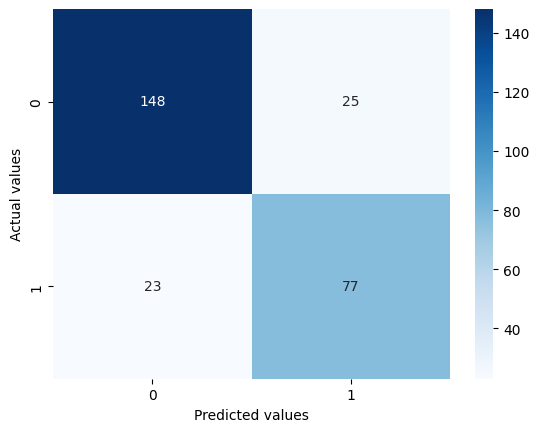

In [61]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d", cmap="Blues")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")